# COCKATIEL on Different NLP Models

## Set Up

In [1]:
# Move the current path to the repo
%cd "../cockatiel/"

C:\Users\onurp\Desktop\Analitik\cockatiel


In [2]:
# Enable automatical module reload
%load_ext autoreload
%autoreload 2

## Data Analysis and Preprocessing

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_imbdb_clean = pd.read_csv('./data/IMDB_Dataset_clean.csv', index_col=0)
df_imbdb_clean

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,Petter Mattei's Love in the Time of Money is a...,positive
...,...,...
49992,I thought this movie did a down right good job...,positive
49993,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49994,I am a Catholic taught in parochial elementary...,negative
49995,I'm going to have to disagree with the previou...,negative


In [5]:
print(df_imbdb_clean['sentiment'].value_counts())

sentiment
positive    24999
negative    24998
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the word counts of each sentence 
lengths = [len(string.split()) for string in df_imbdb_clean['review']]

print("Max number of words in a sentence:", max(lengths))
print("Min number of words in a sentence:", min(lengths))
print("Avg number of words in a sentence:", round(sum(lengths) / len(lengths)))

Max number of words in a sentence: 500
Min number of words in a sentence: 4
Avg number of words in a sentence: 209


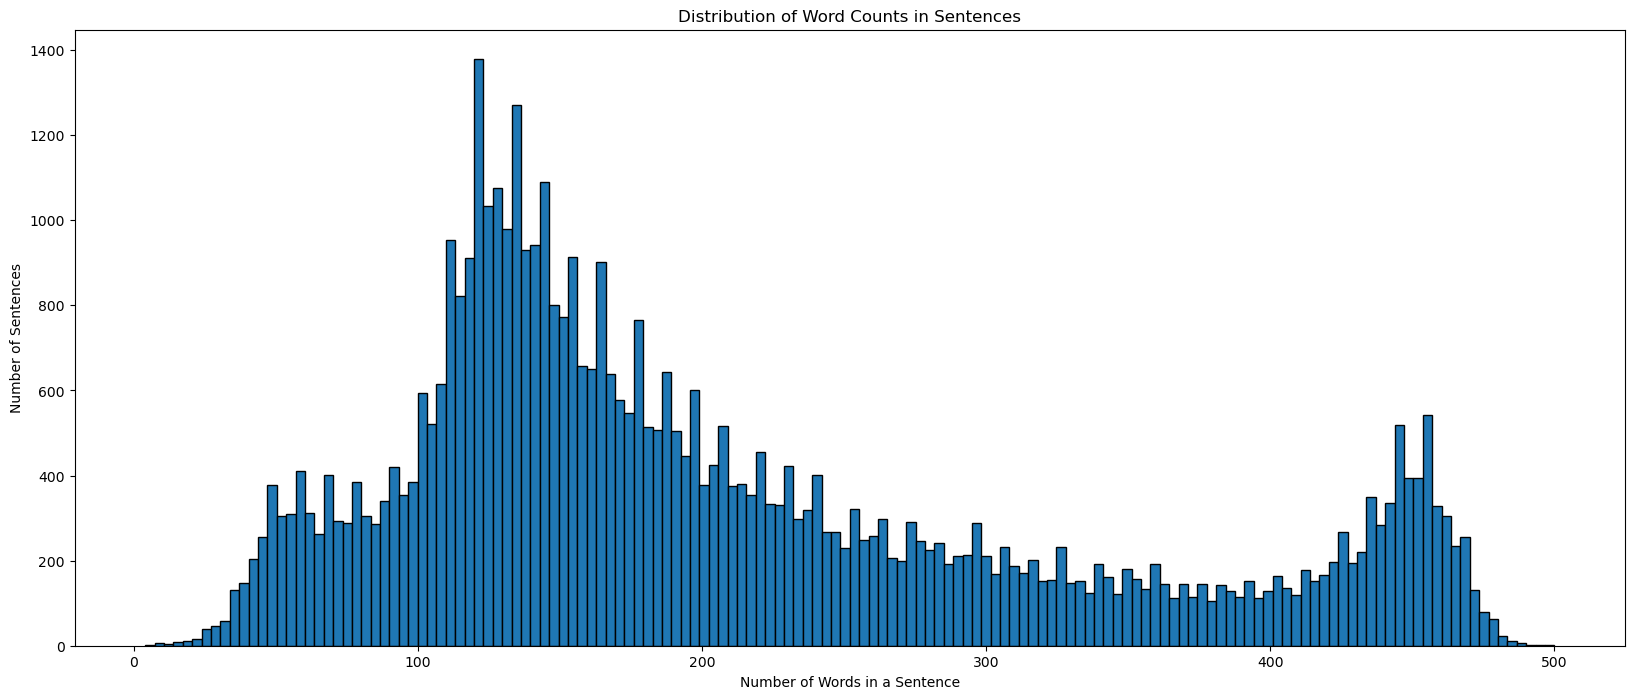

In [7]:
# Generate a histogram to group the data points
hist, bins = np.histogram(lengths, bins=150)

# Create the histogram plot
plt.figure(figsize=(20, 8))
plt.hist(lengths, bins=bins, edgecolor='k')
plt.xlabel('Number of Words in a Sentence')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Word Counts in Sentences')
plt.show()

In [8]:
# Convert the dataset to numpy array
data_np = np.array(df_imbdb_clean)
data_np.shape

(49997, 2)

## Hyperparameters

In [9]:
batch_size = 128

## Load and Inspect Model

In [10]:
import torch
import torchsummary as ts 

# Set up GPU if it is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Selected component:", device)

Selected component: cuda


In [11]:
# Load the model and its tokenizer

from transformers import GPT2TokenizerFast
from cockatiel import CustomGPT2ForSequenceClassification, batch_predict, batcher, tokenize

tokenizer = GPT2TokenizerFast.from_pretrained("hipnologo/gpt2-imdb-finetune")
model = CustomGPT2ForSequenceClassification.from_pretrained("hipnologo/gpt2-imdb-finetune").to(device)

# Put model into evaluation mode
model = model.eval()

2023-10-15 21:01:11,245 SequenceTagger predicts: Dictionary with 47 tags: O, S-NP, B-NP, E-NP, I-NP, S-VP, B-VP, E-VP, I-VP, S-PP, B-PP, E-PP, I-PP, S-ADVP, B-ADVP, E-ADVP, I-ADVP, S-SBAR, B-SBAR, E-SBAR, I-SBAR, S-ADJP, B-ADJP, E-ADJP, I-ADJP, S-PRT, B-PRT, E-PRT, I-PRT, S-CONJP, B-CONJP, E-CONJP, I-CONJP, S-INTJ, B-INTJ, E-INTJ, I-INTJ, S-LST, B-LST, E-LST, I-LST, S-UCP, B-UCP, E-UCP, I-UCP, <START>, <STOP>


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\onurp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\onurp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Some weights of CustomGPT2ForSequenceClassification were not initialized from the model checkpoint at hipnologo/gpt2-imdb-finetune and are newly initialized: ['transformer.gpt2.h.5.attn.c_attn.bias', 'transformer.gpt2.h.11.ln_2.bias', 'transformer.gpt2.h.11.attn.c_attn.bias', 'transformer.gpt2.h.0.ln_2.bias', 'transformer.gpt2.h.3.ln_2.weight', 'transformer.gpt2.h.1.mlp.c_proj.bias', 'transformer.gpt2.h.3.attn.c_proj.weight', 'transformer.gpt2.h.1.ln_2.weight', 'transformer.gpt2.h.1.ln_1.bias', 'transformer.gpt2.h.7.mlp.c_proj.weight', 'transformer.gpt2.h.4.attn.c_attn.bias', 'transformer.gpt2.h.4.attn.c_proj.bias', 'transformer.gpt2.h.9.mlp.c_proj.weight', 'transformer.gpt2.h.6.ln_1.wei

In [12]:
# Make predictions on some samples
y_pred, labels = batch_predict(model.forward, tokenizer, data_np[:100], batch_size, device)

# Compute the activations on which to apply the NMF
features, labels = batch_predict(model.features, tokenizer, data_np[:100], batch_size, device)

# Go from these activations to the final prediction
y_pred_bis = model.end_model(features)

print("Accuracy for classic model        :", torch.mean((torch.argmax(y_pred, -1) == labels.to(device)).float()))
print("Accuracy for model in 'two parts' :", torch.mean((torch.argmax(y_pred_bis, -1) == labels.to(device)).float()))

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.17 GiB. GPU 0 has a total capacty of 4.00 GiB of which 0 bytes is free. Of the allocated memory 7.60 GiB is allocated by PyTorch, and 1.94 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
print(ts.summary(model).total_params)

## Prepare Dataset for COCKATIEL

In [ ]:
# # Store predicted positive (pos) and negative (neg) reviews in lists 

# positive_reviews = []
# negative_reviews = []

# with torch.no_grad():
#     for input_batch in batcher(data_np[:20000], batch_size=batch_size):
        
#         r = np.array(list(map(lambda z: z[0], input_batch)))

#         tokenized_batch = tokenize(r, tokenizer, device)
        
#         preds = model(**tokenized_batch)
        
#         positive_reviews.extend(list(input_batch[np.where(np.argmax(preds.cpu().numpy(), axis=1) == 1)[0]]))
#         negative_reviews.extend(list(input_batch[np.where(np.argmax(preds.cpu().numpy(), axis=1) == 0)[0]]))

# raw_dataset_pos = list(map(lambda z: z[0], positive_reviews))
# raw_dataset_neg = list(map(lambda z: z[0], negative_reviews))

# import pickle

# pickle.dump(raw_dataset_pos, open("../Tez/data/for_gpt2/raw_dataset_pos.pkl", "wb"))
# pickle.dump(raw_dataset_neg, open("../Tez/data/for_gpt2/raw_dataset_neg.pkl", "wb"))

In [17]:
# # Extract the excerpts as a dataset

# sentence_separators = ['.', '...', '?', '!', '..']

# def excerpt_fct(raw_dataset):
    
#     excerpt_dataset = []
    
#     for review in raw_dataset[:100000]:
        
#         review = str(review)

#         for sep in sentence_separators:
            
#             review = review.replace(sep, '.')
  
#         cropped_review = review.split('.')
    
#         for crop in cropped_review:
            
#             if len(crop):
#                 crop = crop + '.'
                
#                 while crop[0] == ' ':
#                     crop = crop[1:]
      
#                 if crop[0].isupper():  
#                     excerpt_dataset.append(crop)
                
#     return excerpt_dataset
  
# excerpt_dataset_pos = excerpt_fct(raw_dataset_pos)
# excerpt_dataset_neg = excerpt_fct(raw_dataset_neg)

# print(len(excerpt_dataset_pos), ' positives excerpts created.')
# print(len(excerpt_dataset_neg), ' negatives excerpts created.')

# pickle.dump(excerpt_dataset_pos, open("../Tez/data/for_gpt2/excerpt_dataset_pos.pkl", "wb"))
# pickle.dump(excerpt_dataset_neg, open("../Tez/data/for_gpt2/excerpt_dataset_neg.pkl", "wb"))

197820  positives excerpts created.
21759  negatives excerpts created.


In [ ]:
import pickle

raw_dataset_pos = pickle.load(open("../Tez/data/for_gpt2/raw_dataset_pos.pkl", "rb"))
raw_dataset_neg = pickle.load(open("../Tez/data/for_gpt2/raw_dataset_neg.pkl", "rb"))

excerpt_dataset_pos = pickle.load(open("../Tez/data/for_gpt2/excerpt_dataset_pos.pkl", "rb"))
excerpt_dataset_neg = pickle.load(open("../Tez/data/for_gpt2/excerpt_dataset_neg.pkl", "rb"))

## Train COCKATIEL

In [ ]:
from cockatiel import COCKATIEL

len_data = 50000  

In [ ]:
# Run COCKATIEL on positive reviews

with torch.no_grad():
    
    cockatiel_explainer_pos = COCKATIEL(model, tokenizer, components=20, 
                                        batch_size=128, device=device)
    # batch size 64 tü
    segments_pos, u_segments_pos, factorization_pos, global_importance_pos = cockatiel_explainer_pos.extract_concepts(excerpt_dataset_pos[:len_data], 
                                                                                                                      raw_dataset_pos[:(len_data//10)], 
                                                                                                                      1, limit_sobol=1_000)
    
pickle.dump(segments_pos, open("../Tez/data/for_gpt2/segments_pos.pkl", "wb"))
pickle.dump(u_segments_pos, open("../Tez/data/for_gpt2/u_segments_pos.pkl", "wb"))
pickle.dump(factorization_pos, open("../Tez/data/for_gpt2/factorization_pos.pkl", "wb"))
pickle.dump(global_importance_pos, open("../Tez/data/for_gpt2/global_importance_pos.pkl", "wb"))

In [ ]:
# Run COCKATIEL on negative reviews

with torch.no_grad():
    
    cockatiel_explainer_neg = COCKATIEL(model, tokenizer, components=20, 
                                        batch_size=128, device=device)
    
    segments_neg, u_segments_neg, factorization_neg, global_importance_neg = cockatiel_explainer_neg.extract_concepts(excerpt_dataset_neg[:len_data], 
                                                                                            raw_dataset_neg[:(len_data//10)], 
                                                                                            0, limit_sobol=1_000)
    
pickle.dump(segments_neg, open("../Tez/data/for_gpt2/segments_neg.pkl", "wb"))
pickle.dump(u_segments_neg, open("../Tez/data/for_gpt2/u_segments_neg.pkl", "wb"))
pickle.dump(factorization_neg, open("../Tez/data/for_gpt2/factorization_neg.pkl", "wb"))
pickle.dump(global_importance_neg, open("../Tez/data/for_gpt2/global_importance_neg.pkl", "wb"))

## Run COCKATIEL

In [ ]:
# Segments and global importances for positive class

segments_pos = pickle.load(open("../Tez/data/for_gpt2/segments_pos.pkl",'rb'))
u_segments_pos = pickle.load(open("../Tez/data/for_gpt2/u_segments_pos.pkl",'rb'))
factorization_pos = pickle.load(open("../Tez/data/for_gpt2/factorization_pos.pkl",'rb'))
global_importance_pos = pickle.load(open("../Tez/data/for_gpt2/global_importance_pos.pkl",'rb'))

# Segments and global importances for negative class

segments_neg = pickle.load(open("../Tez/data/for_gpt2/segments_neg.pkl",'rb'))
u_segments_neg = pickle.load(open("../Tez/data/for_gpt2/u_segments_neg.pkl",'rb'))
factorization_neg = pickle.load(open("../Tez/data/for_gpt2/factorization_neg.pkl",'rb'))
global_importance_neg = pickle.load(open("../Tez/data/for_gpt2/global_importance_neg.pkl",'rb'))

### Visualize Concept Importances

In [ ]:
from cockatiel import occlusion_concepts, print_legend, viz_concepts

In [ ]:
plt.figure(figsize=(22, 5))

plt.subplot(121)
cm = plt.get_cmap('tab20')
plt.bar(range(len(global_importance_pos)), global_importance_pos, color=cm.colors, tick_label=range(len(global_importance_pos)))
plt.title("Concepts for Positive Class")

plt.subplot(122)
cm = plt.get_cmap('tab20')
plt.bar(range(len(global_importance_neg)), global_importance_neg, color=cm.colors, tick_label=range(len(global_importance_neg)))
plt.title("Concepts for Negative Class")

plt.show()

### Visualize Occlusion's Part

In [ ]:
n = 10 #number of reviews for each labels and each concept
m_pos = 2 #number of concept looked for the positive class (we look the m_pos more importants)
m_neg = 3 #number of concept looked for the negative class (we look the m_neg more importants)

l_concept_id_pos = np.argsort(global_importance_pos)[::-1][:m_pos]
l_concept_id_neg = np.argsort(global_importance_neg)[::-1][:m_neg]

l_mip_sentences_pos, l_mip_sentences_neg = [], []

#we add sentence of positive label

for concept_id in l_concept_id_pos:
    
    mip_sentences_ids = np.argsort(u_segments_pos[:, concept_id])[::-1][:n]
    mip_sentences = np.array(segments_pos)[mip_sentences_ids]
    l_mip_sentences_pos.append(mip_sentences)

#we add sentence of negative label

for concept_id in l_concept_id_neg:
    
    mip_sentences_ids = np.argsort(u_segments_neg[:, concept_id])[::-1][:n]
    mip_sentences = np.array(segments_neg)[mip_sentences_ids]
    l_mip_sentences_neg.append(mip_sentences)

l_mip_sentences_pos = np.array(l_mip_sentences_pos)
l_mip_sentences_pos = l_mip_sentences_pos.flatten()
l_mip_sentences_neg = np.array(l_mip_sentences_neg)
l_mip_sentences_neg = l_mip_sentences_neg.flatten() 

In [ ]:
# Create dictionnaries for legend with a color for each concept:
#We use m_pos+m_neg concepts, so we have to create a dictionnary "colors" with m_pos+m_neg colors. 
#In the dictionnary "label_to_criterion", we add the corresponding concept for each color.

colors = {
    0: "rgba(9, 221, 55, ", #green
    1: "rgba(9, 221, 161, ", #turquoise
    #2: "rgba(9, 175, 221, ", #blue
    2: "rgba(221, 9, 34, ", #red
    3: "rgba(221, 9, 140,", #pink
    4: "rgba(221, 90, 9, ", #orange
}

label_to_criterion = {
    0: "Positive label: concept1",
    1: "Positive label: concept2",
    #2: "Positive label: concept3",
    2: "Negative label: concept1",
    3: "Negative label: concept2",
    4: "Negative label: concept3",
}


#sanity check:
if len(label_to_criterion.keys()) != len(colors.keys()) or len(label_to_criterion.keys()) != (m_pos + m_neg):
    print("Error: check that you have the correct number of colors and labels in your dictionaries to cover the number of concepts being looked at")

In [ ]:
print_legend(colors, label_to_criterion)

print("positive predicted reviews:")
print("\n")
i = 0
for sentence in l_mip_sentences_pos:
    if i%n == 0 :
        print("\n")
        print(str(n) + " most important reviews for positive predicted label - concept" + str(i//n + 1) +":")
        print("\n")
    phi = occlusion_concepts(sentence, model, tokenizer, [factorization_pos, factorization_neg], [l_concept_id_pos, l_concept_id_neg], ignore_words = [], two_labels = True, device = device)
    phi /= np.max(np.abs(phi)) + 1e-5
    viz_concepts(sentence, phi, colors, ignore_words = [])
    i += 1

print("\n")
print("negative predicted reviews:")
print("\n")

i = 0
for sentence in l_mip_sentences_neg:
    
    if i%n == 0 :
        print("\n")
        print(str(n) + " most important reviews for negative predicted label - concept" + str(i//n + 1) +":")
        print("\n")
    phi = occlusion_concepts(sentence,  model, tokenizer, [factorization_pos, factorization_neg], [l_concept_id_pos, l_concept_id_neg], ignore_words = [], two_labels = True, device = device)
    phi /= np.max(np.abs(phi)) + 1e-5
    viz_concepts(sentence, phi, colors, ignore_words = [])
    i +=1